<h1 style='text-align: center;'> B-cell Epitope Immune Response | Rafael Almazan </h1>
<h3 style='text-align: center;'> Exploratory Data Analysis </h3>


## Introduction and Background information:
In this analysis, we are talking about different proteins, peptides, and their features. A peptide is defined as two or more animo acids joined together and a protein is a collection of peptides. Peptide sequences could be seen as pieces and regions of a much longer protein sequence. For this study, we are interested in epitopes.

<div style="text-align:center">
    <img src="AA-Peptide-Protein.png" alt="Image" width="650" height="200">
</div>

An epitope is the region of an antigen or peptide that gets recognized by and binds to the immune system, including anitbodies, B-cells or T-cells. For the purposes of this analysis, the term "epitope" will be referring specifically to the B-cell epitopes. These are regions that bind to a B-cell and will trigger physiological events that lead to the production and secretion of antibodies, creating an immune response.

Whether a peptide in a protein sequence is epitopic or non-epitopic will serve as the target variable for this analysis and may be referred to an "immune response" or "antibody activity", these terms imply the same thing.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
%matplotlib inline

In [35]:
#read in bcell and sars combined dataset
df = pd.read_csv('data/bcell_sars_cleaned.csv')
df.head()

,parent_protein_id,protein_seq,start_position,peptide_seq,peptide_length,chou_fasman,emini,kolaskar_tongaonkar,parker,parent_isoelectric_point,parent_aromaticity,parent_hydrophobicity,parent_instability_index,antibody_activity,isoelectric_point,aromaticity,molecular_weight,instability_index,hydrophobicity,charge_at_pH=7.4,amino_acid_ala,amino_acid_arg,amino_acid_asn,amino_acid_asp,amino_acid_cys,amino_acid_gln,amino_acid_glu,amino_acid_gly,amino_acid_his,amino_acid_ile,amino_acid_leu,amino_acid_lys,amino_acid_met,amino_acid_phe,amino_acid_pro,amino_acid_ser,amino_acid_thr,amino_acid_trp,amino_acid_tyr,amino_acid_val,peptide_mask
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,SASFT,5,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1,5.240009,0.2,511.5255,8.00,0.46,-0.539854,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,LCLKI,5,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1,8.222249,0.0,588.8033,12.56,2.14,0.749202,0,0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,AHRET,5,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1,6.794385,0.0,612.6361,-8.98,-2.02,-0.114151,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,SNYDD,5,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1,4.050028,0.2,612.5432,55.36,-2.52,-2.535430,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,DGTYR,5,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1,5.835682,0.2,610.6168,-42.80,-2.08,-0.239787,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [36]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14896 entries, 0 to 14895
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   parent_protein_id         14896 non-null  object 
 1   protein_seq               14896 non-null  object 
 2   start_position            14896 non-null  int64  
 3   peptide_seq               14896 non-null  object 
 4   peptide_length            14896 non-null  int64  
 5   chou_fasman               14896 non-null  float64
 6   emini                     14896 non-null  float64
 7   kolaskar_tongaonkar       14896 non-null  float64
 8   parker                    14896 non-null  float64
 9   parent_isoelectric_point  14896 non-null  float64
 10  parent_aromaticity        14896 non-null  float64
 11  parent_hydrophobicity     14896 non-null  float64
 12  parent_instability_index  14896 non-null  float64
 13  antibody_activity         14896 non-null  int64  
 14  isoele

In [37]:
# getting a high-level description
df.describe()

,start_position,peptide_length,chou_fasman,emini,kolaskar_tongaonkar,parker,parent_isoelectric_point,parent_aromaticity,parent_hydrophobicity,parent_instability_index,antibody_activity,isoelectric_point,aromaticity,molecular_weight,instability_index,hydrophobicity,charge_at_pH=7.4,amino_acid_ala,amino_acid_arg,amino_acid_asn,amino_acid_asp,amino_acid_cys,amino_acid_gln,amino_acid_glu,amino_acid_gly,amino_acid_his,amino_acid_ile,amino_acid_leu,amino_acid_lys,amino_acid_met,amino_acid_phe,amino_acid_pro,amino_acid_ser,amino_acid_thr,amino_acid_trp,amino_acid_tyr,amino_acid_val
count,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.00000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000
mean,308.773362,11.662930,0.994906,1.074277,1.021807,1.749920,7.016036,0.077128,-0.394228,43.343509,0.270677,6.637019,0.081268,1315.638760,39.796292,-0.446993,-0.320847,0.869092,0.605867,0.551557,0.647758,0.205693,0.515575,0.770610,0.816864,0.252148,0.596133,0.979189,0.742146,0.23315,0.446429,0.686560,0.821966,0.693139,0.131512,0.382452,0.715091
std,358.462133,5.476346,0.123667,1.736873,0.053430,1.955039,1.875898,0.026377,0.392888,16.505895,0.444324,2.371572,0.089386,611.607761,41.706426,1.001652,1.802530,1.111408,0.906692,0.803584,0.873110,0.546081,0.803583,0.995363,1.051682,0.530818,0.836573,1.119798,1.002400,0.51086,0.729618,1.016466,1.088740,0.941752,0.372193,0.697869,0.918090
min,1.000000,5.000000,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000,4.050028,0.000000,411.452800,-63.075000,-4.180000,-15.135852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,9.000000,0.913000,0.244000,0.987000,0.600000,5.569763,0.062500,-0.600131,31.725753,0.000000,4.407261,0.000000,1019.841000,9.949167,-1.066667,-1.238964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,197.000000,10.000000,0.991000,0.551000,1.021000,1.775000,6.447815,0.075949,-0.318259,41.984246,0.000000,5.954987,0.066667,1241.317550,33.600000,-0.430000,-0.239787,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,399.250000,15.000000,1.073000,1.207000,1.055000,2.962000,8.676575,0.093458,-0.189591,49.101172,1.000000,8.598487,0.133333,1626.837400,62.133500,0.166667,0.760092,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,3079.000000,393.000000,1.546000,40.605000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000,11.999968,0.571429,42960.216400,381.660000,3.814286,7.753099,24.000000,16.000000,21.000000,22.000000,15.000000,17.000000,14.000000,28.000000,5.000000,24.000000,30.000000,15.000000,6.00000,21.000000,24.000000,37.000000,32.000000,5.000000,16.000000,26.000000


In [38]:
# list of epitope methods from IEDB
methods = ['chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker']

# list of numerical column names that are not amino acids
features = ['start_position','peptide_length', 'chou_fasman', 'emini', 'kolaskar_tongaonkar',
            'parker', 'parent_isoelectric_point', 'parent_aromaticity',
            'parent_hydrophobicity', 'parent_instability_index', 'isoelectric_point', 'aromaticity',
            'molecular_weight', 'instability_index', 'hydrophobicity']

# list of peptide feature columns
peptide_features = ['start_position','peptide_length', 'chou_fasman', 'emini', 'kolaskar_tongaonkar','parker',
                    'isoelectric_point', 'aromaticity', 'molecular_weight', 'instability_index', 'hydrophobicity']

# list of parent protein feature columns
protein_features = ['parent_isoelectric_point', 'parent_aromaticity', 'parent_hydrophobicity', 'parent_instability_index']

# list of amino acid columns
aa_features = ['amino_acid_ala', 'amino_acid_arg', 'amino_acid_asn', 'amino_acid_asp', 'amino_acid_cys', 
               'amino_acid_gln', 'amino_acid_glu', 'amino_acid_gly', 'amino_acid_his', 'amino_acid_ile',
               'amino_acid_leu', 'amino_acid_lys', 'amino_acid_met', 'amino_acid_phe', 'amino_acid_pro', 
               'amino_acid_ser', 'amino_acid_thr', 'amino_acid_trp', 'amino_acid_tyr', 'amino_acid_val']

# creating DataFrame of Numeric columns and target variable
X = df.drop(['parent_protein_id', 'protein_seq', 'peptide_seq', 'antibody_activity', 'peptide_mask'], axis=1)
y = df['antibody_activity']

## Basic Analysis - Distributions

Now, that we have our data loaded, we will start to look at some basic EDA. We will start by looking at the distributions of some of our key features taken from the literature.

Since we have many different features, we will take a look at distribution in batches, prioritizing the most important features to epitope prediction (immune response)

To start, we'll take a look at the distribution of our target variable, whether or not an immune response was induced

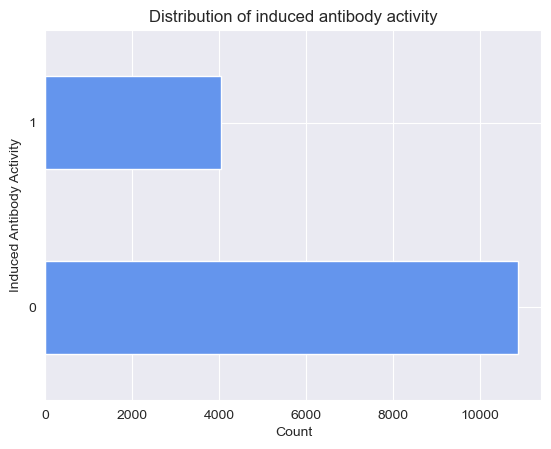

0    10864
1     4032
Name: antibody_activity, dtype: int64

In [39]:
# check the distribution of our target data with a horizontal bar graph
df['antibody_activity'].value_counts().plot(kind='barh', color='cornflowerblue')
plt.title('Distribution of induced antibody activity')
plt.xlabel('Count')
plt.ylabel('Induced Antibody Activity')
plt.show()

# show the count distribution between the two classes
display(df.antibody_activity.value_counts())


There is an imbalance in our target variable. The epitopic peptides only make up about 28% of the data while the rest is non-epitopic. This may cause complications for building our models so we will keep this in mind and work with this later.

Next we will take a look at the distribution of our "methods for predicting antibody epitopes" taken from http://tools.iedb.org/bcell/help/. We will also be separating the distributions by whether or not they elicit an immune response through antibody activity and compare the distributions between the two target classes. 

Explanations of the methods are below:

**Chou and Fasman:** This is the scale used for looking at protein structures by predicting &Beta;-turns and thus help predict regions that could become antigenic sites or epitopes. https://doi.org/10.1021/bi00699a002

**Emini:** This is the measure of solven-accessible surface area of the amino acids. Higher values may mean that the peptide is more likely to be exposed to the immune system and interact with other molecules (B-Cells). https://doi.org/10.1128%2Fjvi.55.3.836-839.1985

**Kolaskar and Tongaonkar:** This is a method to predict the probability of a given sequence to be antigenic. It was directly created to determine a molecule's potential to induce an immune response and is based on experimentally determined antigenic determinants. https://doi.org/10.1016/0014-5793(90)80535-q

**Parker:** This determines the hydrophilicity of an amino acid residue in proteins. The numerical score is based on the peptide's chemical properties and averaged over the length of the peptide. Hydrophilic regions of a protein are more likely to be exposed to the immune system and induce antibody activity. https://doi.org/10.1021/bi00367a013



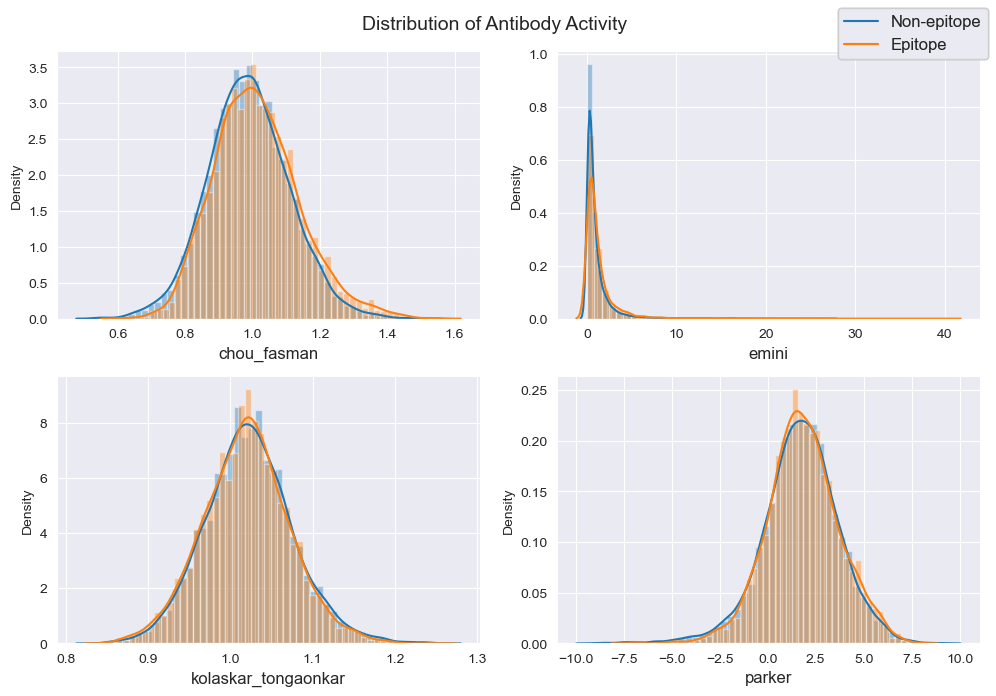

In [40]:
#Prep to visualize distribution of target class by the different methods
target = df['antibody_activity'].astype("bool").values
fig, axes = plt.subplots(2, 2,figsize=(10,7))
axes = [x for a in axes for x in a]

# iterate over columns and plot distribution
for i,name in enumerate(X[methods]):
    value = df[name]
    sns.distplot(value[~target],ax = axes[i], kde=True, bins=50)
    sns.distplot(value[target],ax = axes[i], kde=True, bins=50)
    axes[i].set_xlabel(name,fontsize=12)

    fig.legend(labels = ["Non-epitope","Epitope"],loc="upper right",fontsize=12)
fig.suptitle("Distribution of Antibody Activity", fontsize=14)
plt.tight_layout()

Looking at the distribution of each method feature, we can see that they are all normally distributed. We also see that there is no difference in the distribution of peptides that induce antibody activity and peptides that do not induce antibody activity.

Next, we'll look at the distributions of the parent protein features, since these were the features included in our dataset and used in the paper.

parent_isoelectric_point    745
parent_aromaticity          688
parent_hydrophobicity       758
parent_instability_index    758
dtype: int64

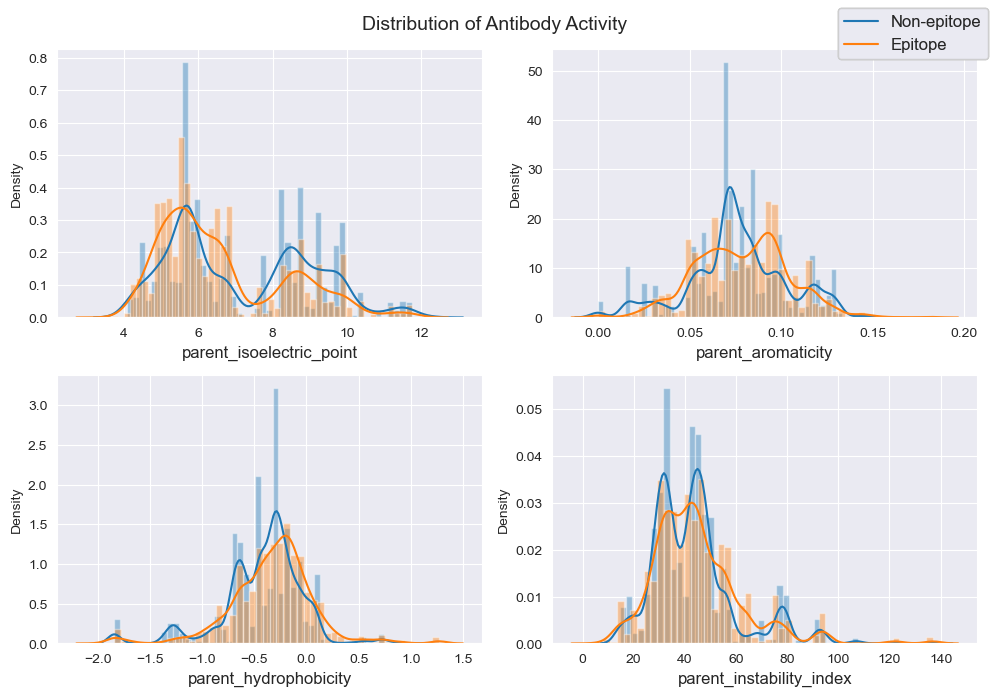

In [41]:
target = df['antibody_activity'].astype("bool").values
fig, axes = plt.subplots(2, 2,figsize=(10,7))
axes = [x for a in axes for x in a]
for i,name in enumerate(X[protein_features]):
    value = df[name]
    sns.distplot(value[~target],ax = axes[i], kde=True, bins=50)
    sns.distplot(value[target],ax = axes[i], kde=True, bins=50)
    axes[i].set_xlabel(name,fontsize=12)
    fig.legend(labels = ["Non-epitope","Epitope"],loc="upper right",fontsize=12)
fig.suptitle("Distribution of Antibody Activity", fontsize=14)  # Set the title for the entire figure

plt.tight_layout()

X[protein_features].nunique()

Looking at the distribution of these we see more difference between target classes. The parent isoelectric point shows a bimodal distribution and a slight difference between the target classes. 

The KDE plots in all these distributions are jagged. This is likely due to the low amount of samples since there could be more than one peptide assigned to each protein. This means that there are much less unique values in these features compared to all the other peptide features.

Next, we will take a look at the distributions of the other peptide distributions.

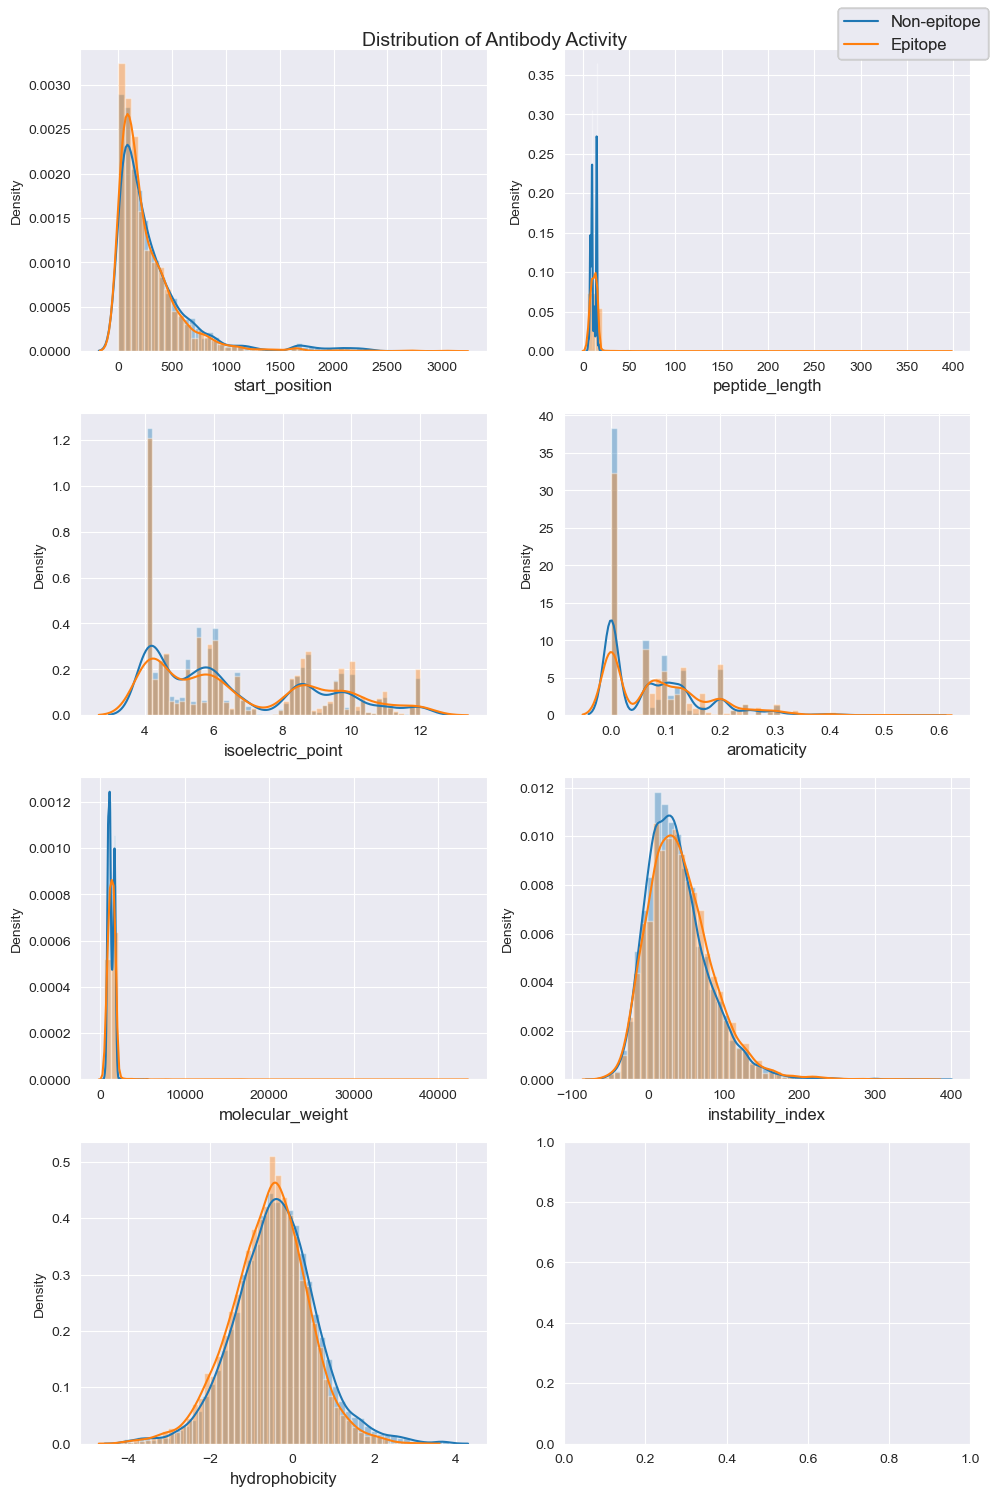

In [42]:
target = df['antibody_activity'].astype("bool").values
fig, axes = plt.subplots(4, 2,figsize=(10,15))
axes = [x for a in axes for x in a]
for i,name in enumerate(X[peptide_features].drop(['emini', 'kolaskar_tongaonkar', 'chou_fasman', 'parker'], axis=1)):
    value = df[name]
    sns.distplot(value[~target],ax = axes[i], kde=True, bins=50)
    sns.distplot(value[target],ax = axes[i], kde=True, bins=50)
    axes[i].set_xlabel(name,fontsize=12)
    fig.legend(labels = ["Non-epitope","Epitope"],loc="upper right",fontsize=12)
fig.suptitle("Distribution of Antibody Activity", fontsize=14)  # Set the title for the entire figure

plt.tight_layout()

In our other peptide distributions, we see mostly normal distributions, however, the aromaticity and isoelectric point are not normally distributed. The molecular weight and peptide length both have outliers of long peptide sequences that result in a very high peptide length and molecular weight. Other than the outliers they look normal. The start position is right-skewed and the instability index seems to be slightly right-skewed too. 

In regards to our target variable (antibody_activity) we see that there is little to no difference in the distributions of the target classes for each feature.

To explore our data further, we will look at the correlations of our features with the presence of an immune response


## Pearson-R correlations against target variable:

Our correlations Hypothesis is as follows:

<center> $H_0: \rho = 0\;\; vs \;\;  H_1: \rho \neq 0$ </center>

**Null Hypothesis:** There is no correlation between the selected feature and whether the peptide is epitopic

**Alternative Hypothesis:** There is some correlation between the selected feature and whether the peptide is epitopic

This hypothesis will be tested through a Pearson's R test with the Pearson's correlation coefficient

In [22]:
# creating Dataframe as a visual
pearson_results = pd.DataFrame(columns=['statistic', 'pvalue', 'statistically significant'], index=X.columns)

# interating over each column and running a pearsonR test with the column and the target variable
for col in X.columns:
    pearson_corr, pvalue = stats.pearsonr(X[col], y)
    pearson_results.loc[col, 'statistic'] = pearson_corr
    pearson_results.loc[col, 'pvalue'] = pvalue
    pearson_results.loc[col, 'statistically significant'] = (pvalue < 0.05)

# showing dataframe
display(pearson_results.sort_values(by='statistic', ascending=False, key=abs))

,statistic,pvalue,statistically significant
parent_isoelectric_point,-0.127073,0.0,True
amino_acid_pro,0.10774,0.0,True
parent_hydrophobicity,0.099975,0.0,True
chou_fasman,0.08618,0.0,True
amino_acid_tyr,0.081399,0.0,True
emini,0.079656,0.0,True
hydrophobicity,-0.071794,0.0,True
start_position,-0.070144,0.0,True
aromaticity,0.063493,0.0,True
amino_acid_arg,0.06085,0.0,True


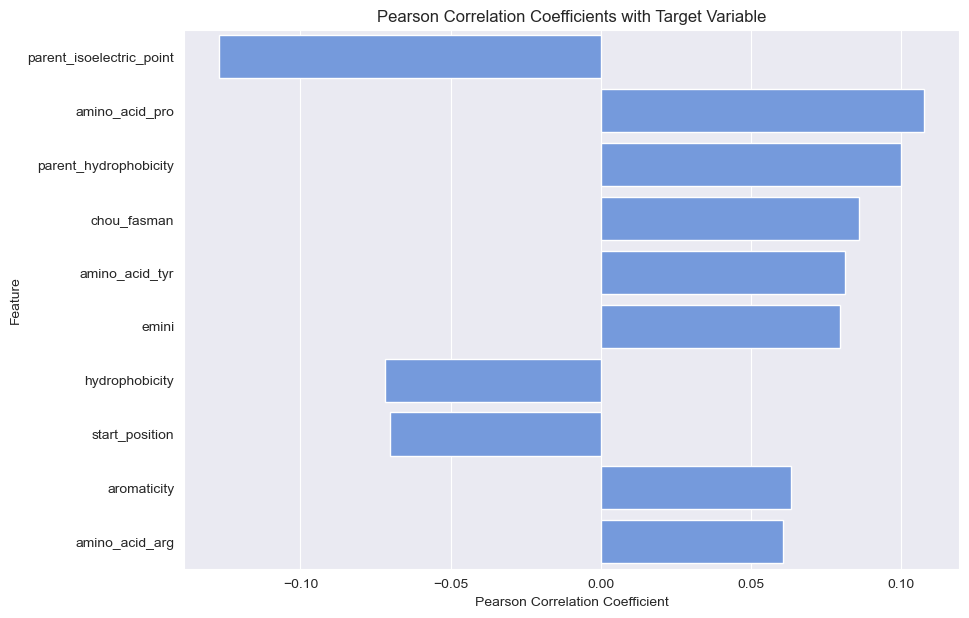

In [63]:
results = pearson_results.sort_values(by='statistic', ascending=False, key=abs).head(10)

# bar chart of top 10 pearsonR correlation coefficients with target variable absolute value
plt.figure(figsize=(10, 7))
sns.barplot(x=results['statistic'], y=results.index, color='cornflowerblue')
plt.title('Pearson Correlation Coefficients with Target Variable')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

Above is a table sorted by highest correlation magnitude to lowest correlation magnitude.

There is very little correlation in the data, however, what correlation there is, is statistically significant for most of the features and we can reject the null hypothesis. We can see that the parent protein's isoelectric point is the most correlated to the target variable. We also see that of the methods given by IEDB, only the Chou Fasman (2) and the Emini (6) values seem to be in the higher correlation range to the target variable. Among the parental features, we see that the parent isoelectric point is the most highly correlated feature to the target variable while parent hydrophobicity comes in third.

Interestingly, we see that the amino acid Proline ranks as the second most highly correlated feature to our target variable. This implies that the presence of proline may have an impact on whether or not the peptide contains an epitope and will elicit an immune response. We will now explore this further by investigating differences in proportions of our target class when proline is present or absent in the antigen

In [24]:
target_proportions = pd.DataFrame()
for i in range(8):
    proportions = df[df['amino_acid_pro'] >= i]['antibody_activity'].value_counts(normalize=True)
    target_proportions.loc[i,'proline_threshold'] = i
    target_proportions.loc[i,'non_epitope'] = proportions[0]
    target_proportions.loc[i,'epitope'] = proportions[1]

target_proportions

,proline_threshold,non_epitope,epitope
0,0.0,0.729323,0.270677
1,1.0,0.690906,0.309094
2,2.0,0.643603,0.356397
3,3.0,0.592244,0.407756
4,4.0,0.500000,0.500000
5,5.0,0.396226,0.603774
6,6.0,0.270270,0.729730
7,7.0,0.176471,0.823529


Text(0.5, 1.0, 'Proportion of Epitopes by Proline Abundance')

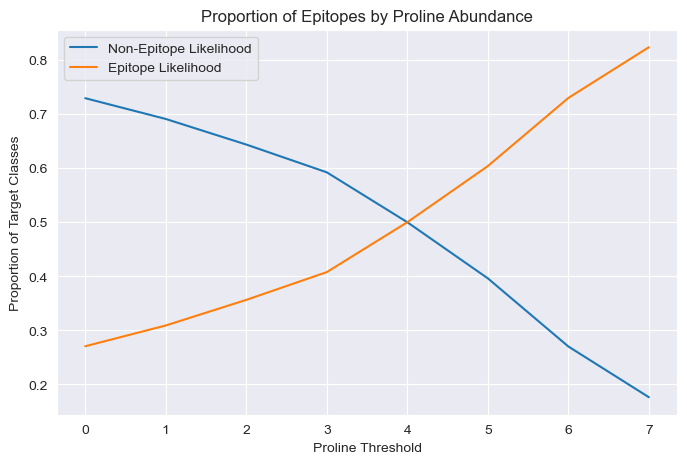

In [25]:
plt.figure(figsize=(8,5))
sns.lineplot(x='proline_threshold', y='non_epitope', data=target_proportions, label='Non-Epitope Likelihood')
sns.lineplot(x='proline_threshold', y='epitope', data=target_proportions, label='Epitope Likelihood')
plt.xlabel('Proline Threshold')
plt.ylabel('Proportion of Target Classes')
plt.title('Proportion of Epitopes by Proline Abundance')

The results of this investigation are interesting. We defined the proline threshold to be the minimum amount of proline molecules required to meet the threshold criteria. For example, if the proline threshold is 1, then it includes all peptides that have one or more proline molecules in its sequence. According to the graph above, we see that as the number of proline molecules increases, the probability of a peptide being epitopic also tends to increase. Similarly, as the proline threshold increases, we tend to see less non-epitopic peptides.

This suggests that the proline molecules may have an effect on the presence or absence of a b-cell epitope. Proline is unique in that it is the only amino acid who's side chain forms a ring with the backbone of the amino acid, causing it to be rigid in structure and makes proline less flexible.

<div style="text-align:center">
    <img src="proline-molecular-structure.jpg" alt="Image" width="400" height="300">
</div>






 Due to the lack of flexibility, proline may not form regular structures in proteins and may contribute to exposing areas in the peptide that can be more accessible for immune cells such as B-cells to bind to. Due to its rigidity, proline amounts tend to be increased in areas with protein-protein interactions (Kini 1995). This could be the reasoning that we see much more epitopic sites as the number of proline molecules increase.

 This information will be important to include in our models since proline can definitely be connected to B-cell epitopes


 

## Method Mean Comparison of Epitope classes:

Next, We'll take a closer look at the "methods for epitope prediction" given by IEDB. We will compare the means of the two target classes and examine if there is a statistically significant difference between the classes. To look at this, we will use **Two-Sample Unpaired t-Test**

Hypothesis Test:

<center> $H_0$: $\mu_{Epitopic} = \mu_{Non-epitopic} $ $\;\; vs \;\;$  $H_1$: $\mu_{Epitopic} \neq \mu_{Non-Epitopic} $ </center>

**Null Hypothesis:** There is no difference between in the means of epitopic and non-epitopic peptides

**Alternative Hypothesis:** There is some difference between in the means of epitopic and non-epitopic peptides

We will start with the Chou Fasman method since it ranked highest on our correlation matrix

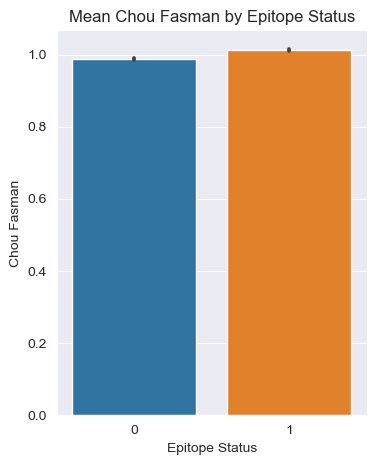

Non-epitopic mean: 0.9884132916053019
Epitopic mean: 1.0123995535714285
The pvalue is: 5.836061171937797e-26


In [26]:
plt.figure(figsize=(4,5))
sns.barplot(x='antibody_activity', y='chou_fasman', data=df)
plt.xlabel('Epitope Status')
plt.ylabel('Chou Fasman')
plt.title('Mean Chou Fasman by Epitope Status')
plt.show()

print(f"Non-epitopic mean: {df[df['antibody_activity'] == 0]['chou_fasman'].mean()}")
print(f"Epitopic mean: {df[df['antibody_activity'] == 1]['chou_fasman'].mean()}")
print(f"The pvalue is: {stats.ttest_ind(df[df['antibody_activity'] == 0]['chou_fasman'],df[df['antibody_activity'] == 1]['chou_fasman'])[1]}")



The chou fasman epitopic and non-epitopic means seem very similar, with the epitopic mean showing slightly higher results. With the use of the t-Test, we see that this difference, albeit small, is statistically significant and we can reject the null hypothesis.

Next, we will take a look at the Emini method

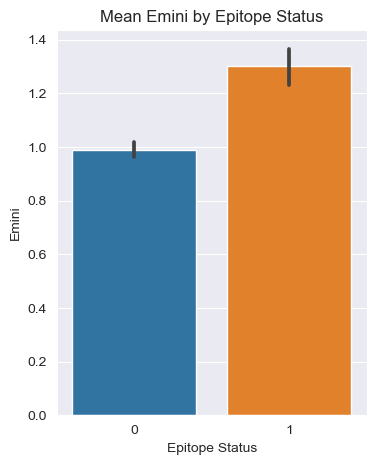

Non-epitopic mean: 0.99
Epitopic mean: 1.3
The pvalue is: 2.10495300292152e-22


In [27]:
plt.figure(figsize=(4,5))
sns.barplot(x='antibody_activity', y='emini', data=df)
plt.xlabel('Epitope Status')
plt.ylabel('Emini')
plt.title('Mean Emini by Epitope Status')
plt.show()

print(f"Non-epitopic mean: {df[df['antibody_activity'] == 0]['emini'].mean().round(2)}")
print(f"Epitopic mean: {df[df['antibody_activity'] == 1]['emini'].mean().round(2)}")
print(f"The pvalue is: {stats.ttest_ind(df[df['antibody_activity'] == 0]['emini'],df[df['antibody_activity'] == 1]['emini'])[1]}")

Here, we see a much wider gap between the means. The emini epitopic mean is visibly larger than the non-epitopic mean. The pvalue is also below our threshold of 0.05 and therefore we can reject the null hypothis and confidently say that these two means are statistically different. This wider margin could be largely due to the way the Emini method is. Since it is a measure of surface accessibility, the higher values of Emini suggest that the peptide is much more likely to be exposed to the immune system and bind to B-cells to induce an immune response, thus, making them epitopic.

We will now look at the kolaskar tongaonkar method

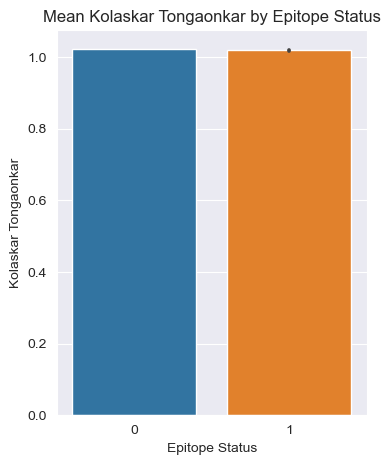

Non-epitopic mean: 1.0228
Epitopic mean: 1.0193
The pvalue is: 0.00037643609298197326


In [28]:
plt.figure(figsize=(4,5))
sns.barplot(x='antibody_activity', y='kolaskar_tongaonkar', data=df)
plt.xlabel('Epitope Status')
plt.ylabel('Kolaskar Tongaonkar')
plt.title('Mean Kolaskar Tongaonkar by Epitope Status')
plt.show()

print(f"Non-epitopic mean: {df[df['antibody_activity'] == 0]['kolaskar_tongaonkar'].mean().round(4)}")
print(f"Epitopic mean: {df[df['antibody_activity'] == 1]['kolaskar_tongaonkar'].mean().round(4)}")
print(f"The pvalue is: {stats.ttest_ind(df[df['antibody_activity'] == 0]['kolaskar_tongaonkar'],df[df['antibody_activity'] == 1]['kolaskar_tongaonkar'])[1]}")

In the bar graph above, the Kolaskar Tongaonkar mean seems to be very similar between the epitopic and non-epitopic classes. However, this slight difference is still shown to be statistically significant and we are able to reject the null hypothesis and say that the means of these two groups do exhibit some difference.

Finally, we will take a look at the Parker method.

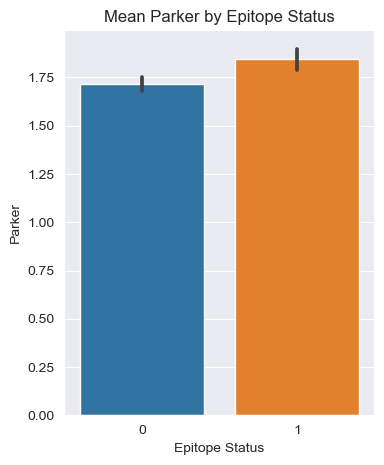

Non-epitopic mean: 1.715
Epitopic mean: 1.8439
The pvalue is: 0.00034965285034338126


In [29]:
plt.figure(figsize=(4,5))
sns.barplot(x='antibody_activity', y='parker', data=df)
plt.xlabel('Epitope Status')
plt.ylabel('Parker')
plt.title('Mean Parker by Epitope Status')
plt.show()

print(f"Non-epitopic mean: {df[df['antibody_activity'] == 0]['parker'].mean().round(4)}")
print(f"Epitopic mean: {df[df['antibody_activity'] == 1]['parker'].mean().round(4)}")
print(f"The pvalue is: {stats.ttest_ind(df[df['antibody_activity'] == 0]['parker'],df[df['antibody_activity'] == 1]['parker'])[1]}")

According to the t-Test, the difference in Parker means between target classes are statistically significant as the p-value is less than 0.05 and we can reject the null hypothesis. 

After running all our methods through a two sample t-Test, we see that the means between target classes are indeed statistically significant. We also see that epitopic peptides tend to have a higher method value compared to the non-epitopic peptides, in all of our methods. However, the means of the Chou Fasman, Kolaskar Tongaonkar and Parker methods are not different by a wide margin. 

In this case, it is important to address that statistical significance does not equate to practical significance. Since our sample size is decently large (> 14,000) the statistically significant differences may not necessarily mean we have a practical difference since the effect size is not large. 

Since the p-values are all below 0.05, we can say that the difference in these means are not by chance. In terms of practical significance, We know from previous studies that these method values do indeed contribute to epitope prediction and have scientific implications to the presence or absence of an epitope.


## Investigating the other features that may have impact

Next we will explore one of the parent protein features since it is important to look at the parent protein as a whole since the parent protein will provide the context in which the peptide is naturally present in. These protein features directly influence the accessibility of possible epitope sites within the protein while the peptide sequence gives us information on the specific amino acid composition, as we saw with the proline threshold analysis above.

We will investigate the protein's isoelectric point further since it showed the greatest significant correlation to our target class.

Hypothesis Test:

<center> $H_0$: $\mu_{Epitopic} = \mu_{Non-epitopic} $ $\;\; vs \;\;$  $H_1$: $\mu_{Epitopic} \neq \mu_{Non-Epitopic} $ </center>

**Null Hypothesis:** There is no difference between in the means of epitopic and non-epitopic peptides

**Alternative Hypothesis:** There is some difference between in the means of epitopic and non-epitopic peptides

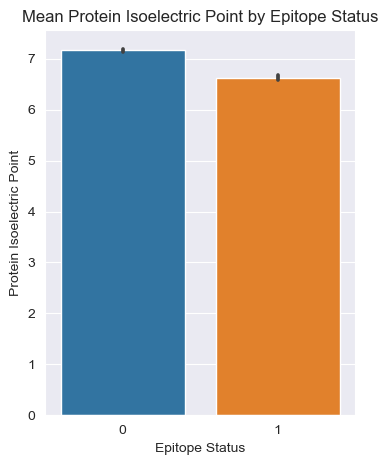

Non-epitopic mean: 7.1613
Epitopic mean: 6.6248
The pvalue is: 1.1459975741082103e-54


In [30]:
plt.figure(figsize=(4,5))
sns.barplot(x='antibody_activity', y='parent_isoelectric_point', data=df)
plt.xlabel('Epitope Status')
plt.ylabel('Protein Isoelectric Point')
plt.title('Mean Protein Isoelectric Point by Epitope Status')
plt.show()

print(f"Non-epitopic mean: {df[df['antibody_activity'] == 0]['parent_isoelectric_point'].mean().round(4)}")
print(f"Epitopic mean: {df[df['antibody_activity'] == 1]['parent_isoelectric_point'].mean().round(4)}")
print(f"The pvalue is: {stats.ttest_ind(df[df['antibody_activity'] == 0]['parent_isoelectric_point'],df[df['antibody_activity'] == 1]['parent_isoelectric_point'])[1]}")

The negative correlation between the parent protein's isoelectric point and whether there are epitopes within it's peptides are further demonstrated by this graph. The means are statistically significant with a p-value lower than 0.05 as we reject the null hypothesis. 

As a reminder, the isoelectric point of a protein is the pH at which a molecule or protein's charge is at a net zero. A lower pH is considered more acidic and a higher pH is considered more alkaline, or basic. This suggests that epitopic peptides seem to come from proteins that are more acidic by nature. However, there could be other chemical factors at play. This requires further research and experimentation to define a cause-and-effect relationship.


## Aromatic Amino Acids

This next portion will explore the aromatic amino acids and its relationship with our aromaticity feature. Aromaticity is the presence of the aromatic compounds (phenylalanine (Phe), tryptophan (Trp), and tyrosine (Tyr)) in a peptide or protein. To investigate this, we will start by looking at a heatmap of the correlations.

<Axes: >

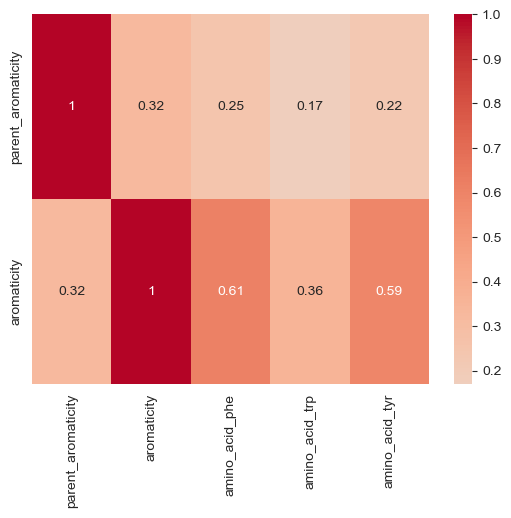

In [31]:
sns.heatmap(X[['parent_aromaticity', 'aromaticity', 'amino_acid_phe', 'amino_acid_trp', 'amino_acid_tyr']].corr()[0:2], annot=True, cmap='coolwarm', center=0)

Looking at the heatmap above, we can see that the aromaticity of each peptide is pretty well correlated with each one of the aromatic amino acids. This makes sense since biopython calculates the aromaticity of a protein or peptide as the relative frequency of these aromatic amino acids in each sequence. That is why we are seeing a strong positive correlation between these features.

## Amino Acid Abundance

Next, we will take a look at which amino acid tend to be more abundant in epitopic peptides. We will separate out only the epitopic peptides and see if there are amino acids that are more abundant than others

In [32]:
epitopic = df[df['antibody_activity'] == 1]
non_epitopic = df[df['antibody_activity'] == 0]

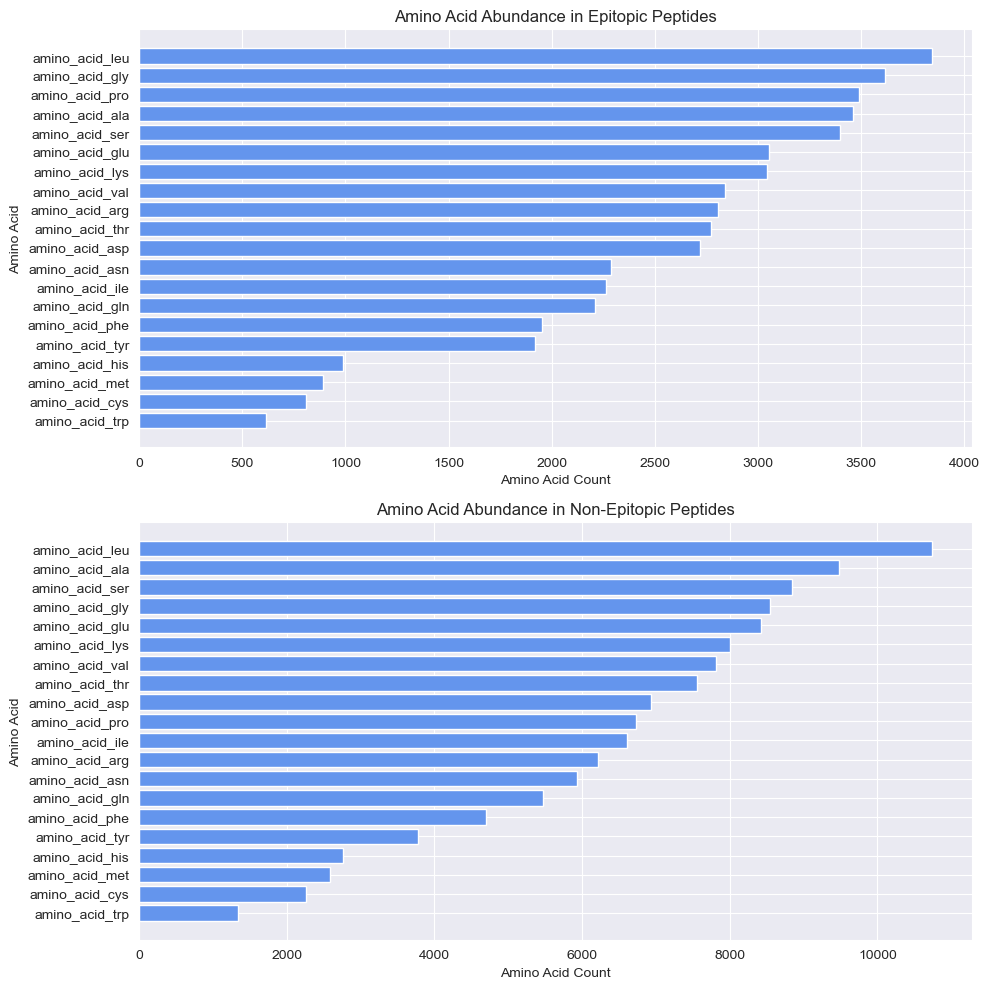

In [33]:
amino_acid_columns_e = epitopic.columns[epitopic.columns.str.contains(r'amino_acid_')]
amino_acid_df_e = epitopic[aa_features]

amino_acid_columns_ne = non_epitopic.columns[epitopic.columns.str.contains(r'amino_acid_')]
amino_acid_df_ne = non_epitopic[aa_features]

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot for epitopic peptides
axes[0].barh(amino_acid_df_e.sum().sort_values().index, amino_acid_df_e.sum().sort_values(), color='cornflowerblue')
axes[0].set_title('Amino Acid Abundance in Epitopic Peptides')
axes[0].set_xlabel('Amino Acid Count')
axes[0].set_ylabel('Amino Acid')

# Plot for non-epitopic peptides
axes[1].barh(amino_acid_df_ne.sum().sort_values().index, amino_acid_df_ne.sum().sort_values(), color='cornflowerblue')
axes[1].set_title('Amino Acid Abundance in Non-Epitopic Peptides')
axes[1].set_xlabel('Amino Acid Count')
axes[1].set_ylabel('Amino Acid')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


Looking at the most prevalent amino acids in our epitopic peptides, We see that the most abundant amino acid stays to be Leucine. However, the second and third most prevalent amino acid does change. Proline (as we saw above) is much more abundant in epitopic peptides as opposed to non-epitopic peptides. It moves from the 10th position in non-epitopic to the 3rd position in epitopic peptides. This is consistent with our analysis above, indicating that proline-dense peptides are more likely to be epitopes. Other than that, most amino acids stayed in a similar spot, not moving up more than two or three positions.

## Conclusion

Here, we have taken a closer look at the given dataset. We have seen that the target classes (Epitope and Non-Epitope) have very similar distributions and means across every feature. This makes it difficult to distinguish an epitope from a non-epitope. However, we have also seen that the means are actually statistically significant across the 'methods for epitope prediction'. This does not mean practical significance and we cannot be confident that this actually shows us much of anything since they are not different by any wide margin, except for the Emini method. We also uncovered great insight on the relationship of the proline molecule with our target column. We see that as the amount of proline in the peptide increases, so does the likelihood of seeing an epitope. These proline-rich areas may give us further insight on where epitopes lie in a certain protein or peptide. We have also taken a look at the relationship of the aromatic amino acids and the aromaticity of the peptides/proteins and say that there was a fairly high correlation between the amino acids and the feature. As for the rest of the amino acids, We see that Leucine is the most prevalent among both classes. Proline is also much more abundant in epitopes than in non-epitopes, as we might expect it to be.